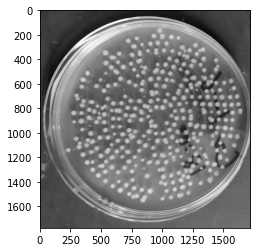

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams["figure.figsize"] = (5.0, 5.0)
# matplotlib.rcParams["image.cmap"] = 'gray'
%matplotlib inline

img = cv2.imread("bactaria.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

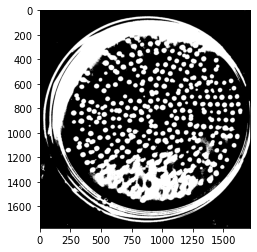

In [2]:
th, img_thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(img_thresh)

In [3]:
kernel_size = 3
element = np.ones((kernel_size,kernel_size), np.uint8)
img_closed = cv2.morphologyEx(img_thresh, cv2.MORPH_CLOSE, element)
img_opened = cv2.morphologyEx(img_closed, cv2.MORPH_OPEN, element)

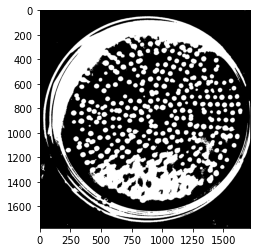

In [6]:
plt.imshow(img_closed)


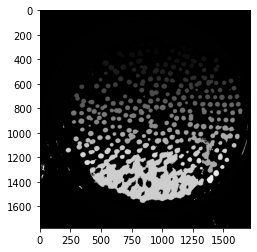

In [4]:
_, img_labels = cv2.connectedComponents(img_opened)
plt.imshow(img_labels)

In [7]:
np.max(img_labels)

302

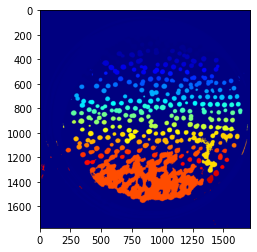

In [8]:
# Get the min and max pixel values and their locations on an image.
(min_val, max_val, min_loc, max_loc) = cv2.minMaxLoc(img_labels)

# Normalize the image so that the min value is 0 and max value is 255.
img_labels = 255 * (img_labels - min_val) / (max_val - min_val)

# Convert the image to 8-bits unsigned type
img_labels = np.uint8(img_labels)

# Apply a color map
img_color_map = cv2.applyColorMap(img_labels, cv2.COLORMAP_JET)
plt.imshow(img_color_map[:,:,::-1])

In [4]:
import numpy as np
import cv2
import os

# for dirname in os.listdir("images/"):

#     for filename in os.listdir("images/" + dirname + "/"):

# Image read
img = cv2.imread("bactaria.jpg", 0)
filename = 'bactaria.jpg'
# Denoising
denoisedImg = cv2.fastNlMeansDenoising(img)

# Threshold (binary image)
# thresh – threshold value.
# maxval – maximum value to use with the THRESH_BINARY and THRESH_BINARY_INV thresholding types.
# type – thresholding type
th, threshedImg = cv2.threshold(denoisedImg, 200, 255,cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU) # src, thresh, maxval, type

# Perform morphological transformations using an erosion and dilation as basic operations
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
morphImg = cv2.morphologyEx(threshedImg, cv2.MORPH_OPEN, kernel)

# Find and draw contours
contours, hierarchy = cv2.findContours(morphImg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contoursImg = cv2.cvtColor(morphImg, cv2.COLOR_GRAY2RGB)
cv2.drawContours(contoursImg, contours, -1, (255,100,0), 3)

cv2.imwrite("result.jpg", contoursImg)
textFile = open("results.txt","a")
textFile.write(filename + " Dots number: {}".format(len(contours)) + "\n")
textFile.close()

Cells: 0


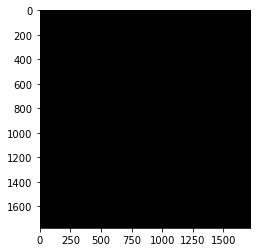

In [3]:
import cv2
import numpy as np
import math

image = cv2.imread("bactaria.jpg")
original = image.copy()
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

hsv_lower = np.array([156,60,0])
hsv_upper = np.array([179,115,255])
mask = cv2.inRange(hsv, hsv_lower, hsv_upper)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=1)
close = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=2)

cnts = cv2.findContours(close, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

minimum_area = 200
average_cell_area = 650
connected_cell_area = 1000
cells = 0
for c in cnts:
    area = cv2.contourArea(c)
    if area > minimum_area:
        cv2.drawContours(original, [c], -1, (36,255,12), 2)
        if area > connected_cell_area:
            cells += math.ceil(area / average_cell_area)
        else:
            cells += 1
print('Cells: {}'.format(cells))
# cv2.imshow('close', close)
# cv2.imshow('original', original)
# cv2.waitKey(0)
plt.imshow(close)

AttributeError: 'MainWindow' object has no attribute 'setupUi'